In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("austinHousingData.csv")
df1.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [6]:
df2 = df1.drop(['streetAddress','garageSpaces','numOfAccessibilityFeatures', 'yearBuilt', 'hasSpa', 'numOfStories', 'hasHeating', 'hasGarage', 'hasCooling', 'hasAssociation', 'zipcode', 'parkingSpaces', 'homeType',  'propertyTaxRate', 'hasView', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize' ,'MedianStudentsPerTeacher', 'zpid', 'description', 'latitude', 'longitude', 'numPriceChanges', 'latest_saledate', 'latest_salemonth', 'latest_saleyear', 'latestPriceSource', 'numOfPhotos', 'homeImage'], axis= 'columns')
df2.head()

,city,latestPrice,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms
0,pflugerville,305000,6011.0,2601,3.0,4
1,pflugerville,295000,6185.0,1768,2.0,4
2,pflugerville,256125,7840.0,1478,2.0,3
3,pflugerville,240000,6098.0,1678,2.0,3
4,pflugerville,239900,6708.0,2132,3.0,3


In [12]:
df2.isnull().sum()

city              0
latestPrice       0
lotSizeSqFt       0
livingAreaSqFt    0
numOfBathrooms    0
numOfBedrooms     0
dtype: int64

In [13]:
df3['bhk'] = df2['numOfBathrooms'] + df2['numOfBedrooms']
df3['area'] = df2['lotSizeSqFt'] + df2['livingAreaSqFt']
df3.head()

,city,latestPrice,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,price_per_bhk,total_size,bhk,area
0,pflugerville,305000,6011.0,2601,3.0,4,38125.000000,8612.0,7.0,8612.0
1,pflugerville,295000,6185.0,1768,2.0,4,42142.857143,7953.0,6.0,7953.0
2,pflugerville,256125,7840.0,1478,2.0,3,42687.500000,9318.0,5.0,9318.0
3,pflugerville,240000,6098.0,1678,2.0,3,40000.000000,7776.0,5.0,7776.0
4,pflugerville,239900,6708.0,2132,3.0,3,34271.428571,8840.0,6.0,8840.0


In [14]:
df4 = df3.drop(['lotSizeSqFt','livingAreaSqFt','numOfBathrooms','numOfBedrooms'],axis='columns')
df4.shape

(15171, 6)

In [15]:
df4.head()

,city,latestPrice,price_per_bhk,total_size,bhk,area
0,pflugerville,305000,38125.000000,8612.0,7.0,8612.0
1,pflugerville,295000,42142.857143,7953.0,6.0,7953.0
2,pflugerville,256125,42687.500000,9318.0,5.0,9318.0
3,pflugerville,240000,40000.000000,7776.0,5.0,7776.0
4,pflugerville,239900,34271.428571,8840.0,6.0,8840.0


In [16]:
df4 = df4.drop(['price_per_bhk'],axis='columns')
df4.head()

,city,latestPrice,total_size,bhk,area
0,pflugerville,305000,8612.0,7.0,8612.0
1,pflugerville,295000,7953.0,6.0,7953.0
2,pflugerville,256125,9318.0,5.0,9318.0
3,pflugerville,240000,7776.0,5.0,7776.0
4,pflugerville,239900,8840.0,6.0,8840.0


In [17]:
df3.city = df2.city.apply(lambda x : x.strip())#clears the data of floating spaces and additonal space
city_stats = df3.groupby('city')['city'].agg('count')
city_stats

city
austin              15020
del valle              86
driftwood              12
dripping springs        5
manchaca                3
manor                   6
pflugerville           36
road                    1
west lake hills         2
Name: city, dtype: int64

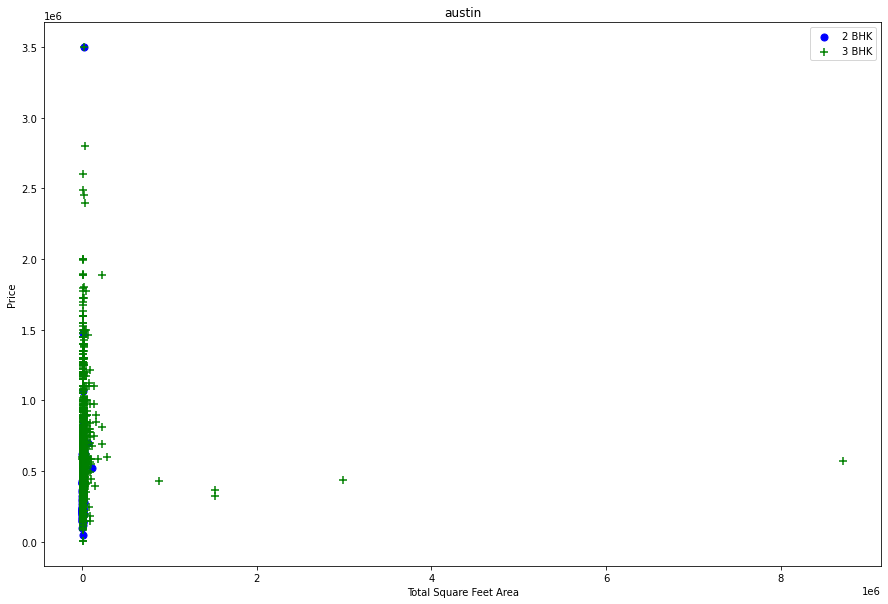

In [24]:
def plot_scatter_chart(df,city):
    bhk2 = df[(df.city==city) & (df.bhk==2)]
    bhk3 = df[(df.city==city) & (df.bhk==7)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_size,bhk2.latestPrice,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_size,bhk3.latestPrice,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(city)
    plt.legend()
    
plot_scatter_chart(df4,"austin")

In [25]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for city, city_df in df.groupby('city'):
        bhk_stats = {}
        for bhk, bhk_df in city_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.latestPrice),
                'std': np.std(bhk_df.latestPrice),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in city_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.latestPrice<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
# df8 = df7.copy()
df5.shape

(7466, 5)

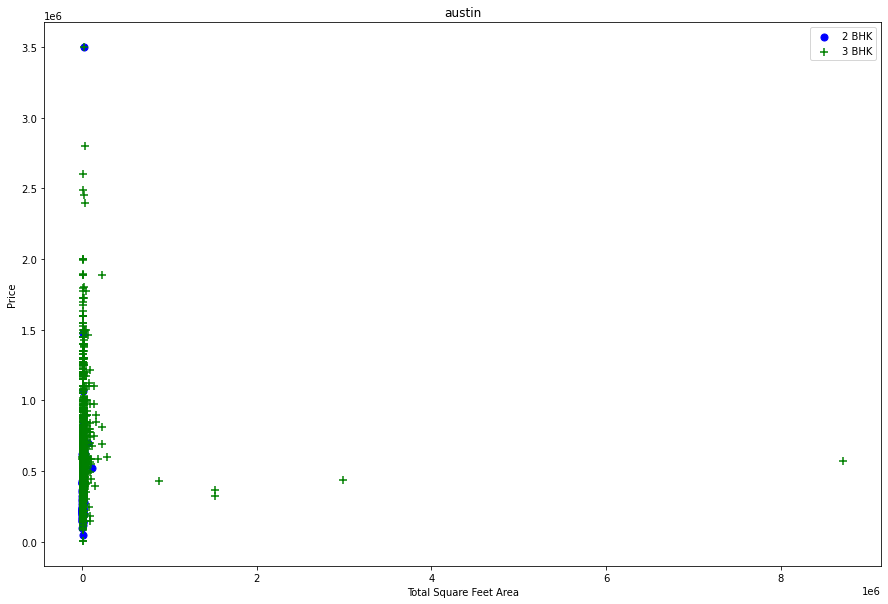

In [26]:
plot_scatter_chart(df4,"austin")

Text(0, 0.5, 'count')

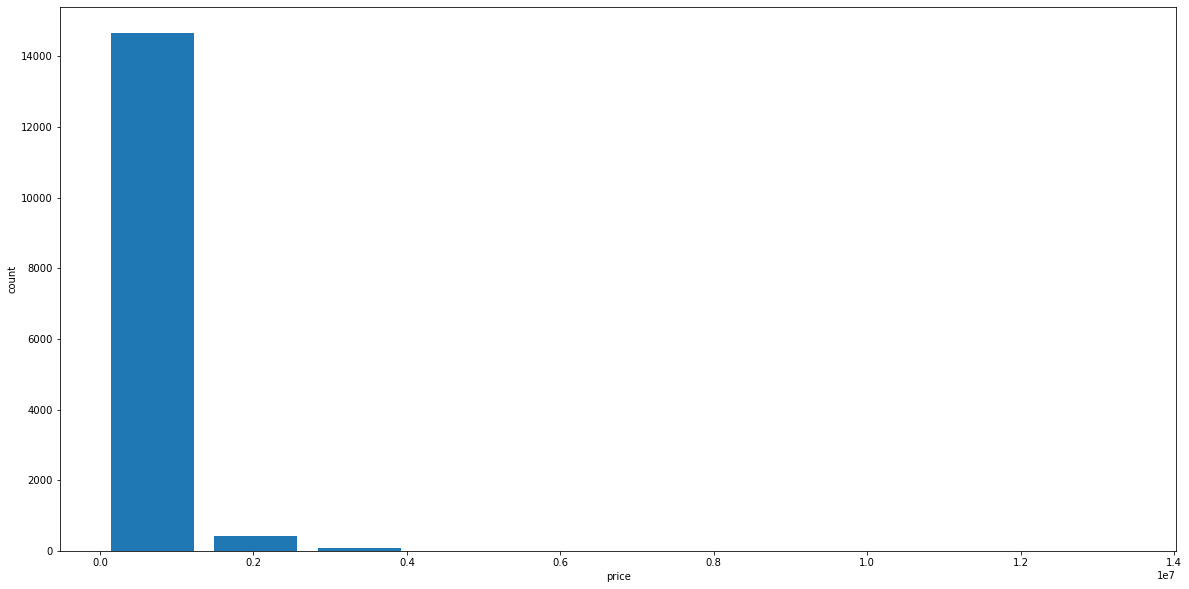

In [27]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df5.latestPrice, rwidth = 0.8)
plt.xlabel("price")
plt.ylabel("count")

In [28]:
dummies = pd.get_dummies(df5.city)
dummies.head(3)

,austin,del valle,driftwood,dripping springs,manchaca,manor,pflugerville,road,west lake hills
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0


In [29]:
df5 = pd.concat([df5,dummies.drop('west lake hills',axis='columns')],axis='columns')
df5.head()

,city,latestPrice,total_size,bhk,area,austin,del valle,driftwood,dripping springs,manchaca,manor,pflugerville,road
0,pflugerville,305000,8612.0,7.0,8612.0,0,0,0,0,0,0,1,0
1,pflugerville,295000,7953.0,6.0,7953.0,0,0,0,0,0,0,1,0
2,pflugerville,256125,9318.0,5.0,9318.0,0,0,0,0,0,0,1,0
3,pflugerville,240000,7776.0,5.0,7776.0,0,0,0,0,0,0,1,0
5,pflugerville,309045,6607.0,5.0,6607.0,0,0,0,0,0,0,1,0


In [30]:
df5 = df5.drop('city',axis='columns')
df5.head()

,latestPrice,total_size,bhk,area,austin,del valle,driftwood,dripping springs,manchaca,manor,pflugerville,road
0,305000,8612.0,7.0,8612.0,0,0,0,0,0,0,1,0
1,295000,7953.0,6.0,7953.0,0,0,0,0,0,0,1,0
2,256125,9318.0,5.0,9318.0,0,0,0,0,0,0,1,0
3,240000,7776.0,5.0,7776.0,0,0,0,0,0,0,1,0
5,309045,6607.0,5.0,6607.0,0,0,0,0,0,0,1,0


In [31]:
X = df5.drop(['latestPrice'],axis='columns')
X.head()

,total_size,bhk,area,austin,del valle,driftwood,dripping springs,manchaca,manor,pflugerville,road
0,8612.0,7.0,8612.0,0,0,0,0,0,0,1,0
1,7953.0,6.0,7953.0,0,0,0,0,0,0,1,0
2,9318.0,5.0,9318.0,0,0,0,0,0,0,1,0
3,7776.0,5.0,7776.0,0,0,0,0,0,0,1,0
5,6607.0,5.0,6607.0,0,0,0,0,0,0,1,0


In [32]:
X.shape

(7466, 11)

In [33]:
y = df5.latestPrice
y.head()

0    305000
1    295000
2    256125
3    240000
5    309045
Name: latestPrice, dtype: int64

In [34]:
len(y)

7466

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [36]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.32496208606062527

In [37]:
#K fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-2.73684020e+02,  1.00700958e-01, -2.56739000e+02,  2.07565461e-01,
        3.02349341e-01])

In [38]:
#Finding the best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-105.962481,{'normalize': False}
1,lasso,-99.030039,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.020622,"{'criterion': 'mse', 'splitter': 'best'}"


In [40]:
def predict_price(city,area,bhk):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [47]:
predict_price('pflugerville',5612.0, 3)

-191235.69284714715

In [48]:
import pickle
with open('dfw_housing_pred.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [49]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))